# Annual reports from the STOXX 600 Index

Puts together the master annual reports file and computes descriptive statistics for the raw dataset (PDF results)


### Config & setup

In [80]:
import os
import sys
import pandas as pd
import numpy as np

sys.path.append('../..')
import data.dataframe_preparation as preparation


In [81]:
ANNUAL_REPORTS_RAW_PATH = "/Volumes/backup/fin-disclosures-nlp/data/annual_reports_raw"
ANNUAL_REPORTS_EXTRACTED_PATH = "/Volumes/backup/fin-disclosures-nlp/data/annual_reports_extracted"
MASTER_FILE_PATH = "/Volumes/backup/fin-disclosures-nlp/data/stoxx600_master.csv"
REPORTS_MASTER_FILE_PATH = "/Volumes/backup/fin-disclosures-nlp/data/stoxx600_reports_master.csv"

## Read in Company / Index master file

Contains the companies as part of the STOXX 600 index (Date?) and the respective country, industry and information from the manual download process

In [82]:
df_master = pd.read_csv(MASTER_FILE_PATH)

In [83]:
df_master

,Unnamed: 0,company_name,country,industry,company_folder,downloaded,assigned,comments,Available up until including
0,0,3i Group PLC,United Kingdom,Financials,3iGroupPLC,True,Tom,NaN,NaN
1,1,A2A SpA,Italy,Utilities,A2ASpA,True,Tom,NaN,NaN
2,2,AAK AB,Sweden,Consumer Staples,AAKAB,True,Tom,NaN,NaN
3,3,Aalberts NV,Netherlands,Industrials,AalbertsNV,True,Tom,NaN,NaN
4,4,AB Skf,Sweden,Industrials,ABSKF,True,Tom,NaN,NaN
...,...,...,...,...,...,...,...,...,...
594,594,VODAFONE GRP,United Kingdom,Telecommunications,gb_vodafone_grp,True,David,NaN,NaN
595,595,ENI,Italy,Energy,it_eni,True,David,NaN,NaN
596,596,INTESA SANPAOLO,Italy,Financials,it_intesa_sanpaolo,True,David,NaN,NaN
597,597,ASML HLDG,Netherlands,Technology,nl_asml_hldg,True,David,NaN,NaN


## Create reports master file

In [84]:
import os
from pathlib import Path
import re

def get_company_paths(path):
    result = []
    for f in os.scandir(path):
        if not f.name.startswith('.') and f.is_dir():
            result.append(f)
    return result


def get_reports_paths(path):
    result = []
    for f in os.scandir(path):
        p = Path(f.path)
        if not f.name.startswith('.') and p.suffix == '.pdf' and f.is_file():
            result.append(p)
    return result


regex= "\d{4}"
rows = []
column_names = ['id', 'company', 'year', 'path', 'extracted', 'inferred']
company_paths = get_company_paths(ANNUAL_REPORTS_RAW_PATH)
for company_dir in company_paths:
    company_files = get_reports_paths(company_dir.path)
    company = company_dir.name
    for p in company_files:
        matches = re.findall("\d{4}", p.stem)
        try:
            assert len(matches) == 1, f"Less / more than one year matched!: {p}"
            year = matches[0]
            report_id = f"{company}-AR_{year}"
            rows.append([report_id, company, year, p, False, False ])
        except:
            print(f"Error - Invalid reports file found: {p}")
            break;
                                                  
df_reports = pd.DataFrame(rows, columns=column_names)

In [85]:
df_reports

,id,company,year,path,extracted,inferred
0,3iGroupPLC-AR_2001,3iGroupPLC,2001,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
1,3iGroupPLC-AR_2002,3iGroupPLC,2002,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
2,3iGroupPLC-AR_2003,3iGroupPLC,2003,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
3,3iGroupPLC-AR_2004,3iGroupPLC,2004,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
4,3iGroupPLC-AR_2005,3iGroupPLC,2005,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
...,...,...,...,...,...,...
8441,ZurRoseGroupAG-AR_2016,ZurRoseGroupAG,2016,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
8442,ZurRoseGroupAG-AR_2017,ZurRoseGroupAG,2017,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
8443,ZurRoseGroupAG-AR_2018,ZurRoseGroupAG,2018,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False
8444,ZurRoseGroupAG-AR_2019,ZurRoseGroupAG,2019,/Volumes/backup/fin-disclosures-nlp/data/annua...,False,False


In [86]:
df_reports.groupby('company')['year'].agg(['min', 'max', 'count'])

,min,max,count
company,,,
3iGroupPLC,2001,2020,19
A2ASpA,2001,2019,7
AAKAB,2005,2019,14
ABNAmroBankNV,2009,2019,7
ABSKF,2000,2019,19
...,...,...,...
it_intesa_sanpaolo,2007,2019,13
nl_asml_hldg,1999,2019,21
nl_ing_grp,2010,2019,10


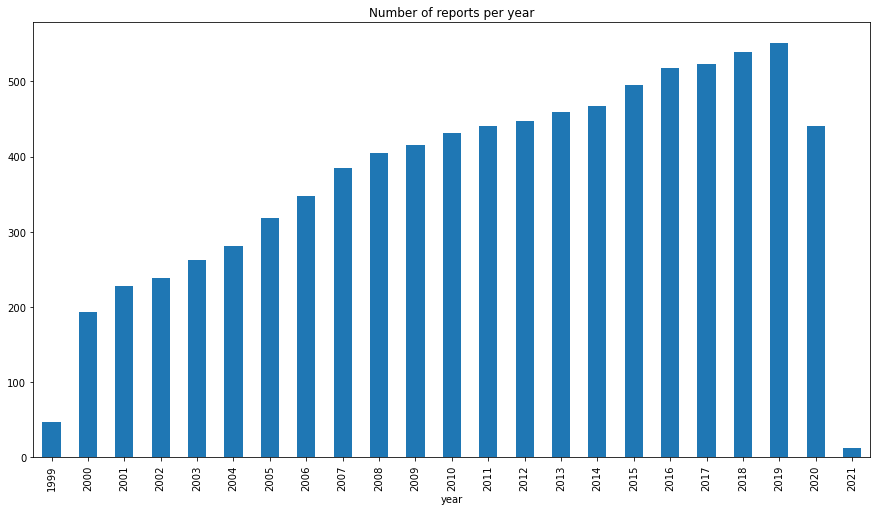

In [87]:
ax = df_reports.groupby(['year']).size().plot(kind="bar", figsize=(15,8), title="Number of reports per year")

## Create master file

In [88]:
df_reports.to_csv(REPORTS_MASTER_FILE_PATH)